## **Group Members**

### 1. **Mohit Rajpurohit**
- **Roll Number:** [48]  
- **Registration Number:** [12415859]

### 2. **Devanshu** 
- **Roll Number:** [56]  
- **Registration Number:** [12410207]

# **Gaming Industry Analysis**

### **Description:**
The objective is to understand the key patterns, trends, and distributions within the video game industry based on available data.  
  
It includes:
- Data loading and preprocessing using **Pandas and NumPy**
- Statistical summary and descriptive analysis
- Visual exploration using **Matplotlib, Seaborn, and Folium**
- Identification of **correlations, outliers**, and key performance metrics

![Video Games](Game.avif)

### **Importing the Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_column",None)

### **Data Preprocessing**

In [2]:
df = pd.read_csv("Video_Games.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# Handle the missing values
df['Year'].fillna(df['Year'].mode()[0], inplace=True)

# Impute missing values in categorical columns with mode
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)

## **Analysis & Visualization**

## **Bar Plot - Top 10 Best-Selling Video Games (Global Sales)**
#### Which Video Games Have the Highest Global Sales of All Time?

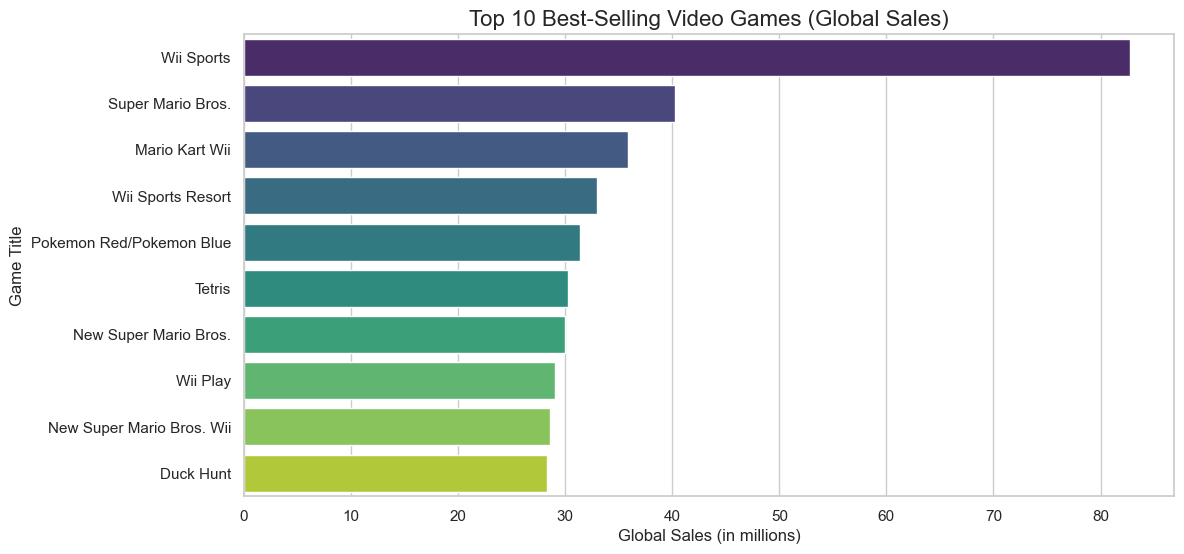

In [27]:
# Set style for visuals
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Top 10 games globally
top_games = df.sort_values(by="Global_Sales", ascending=False).head(10)

# Barplot
sns.barplot(data=top_games, y="Name", x="Global_Sales", palette="viridis")
plt.title("Top 10 Best-Selling Video Games (Global Sales)", fontsize=16)
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Game Title")
plt.show()

## **Pie Plot - Market Share of Game Genres by Global Sales**
#### What is the Market Share of Each Video Game Genre Based on Global Sales?

In [49]:
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [28]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
genre_sales

,Genre,Global_Sales
0,Action,1751.18
1,Sports,1330.93
2,Shooter,1037.37
3,Role-Playing,927.37
4,Platform,831.37
5,Misc,809.96
6,Racing,732.04
7,Fighting,448.91
8,Simulation,392.20
9,Puzzle,244.95


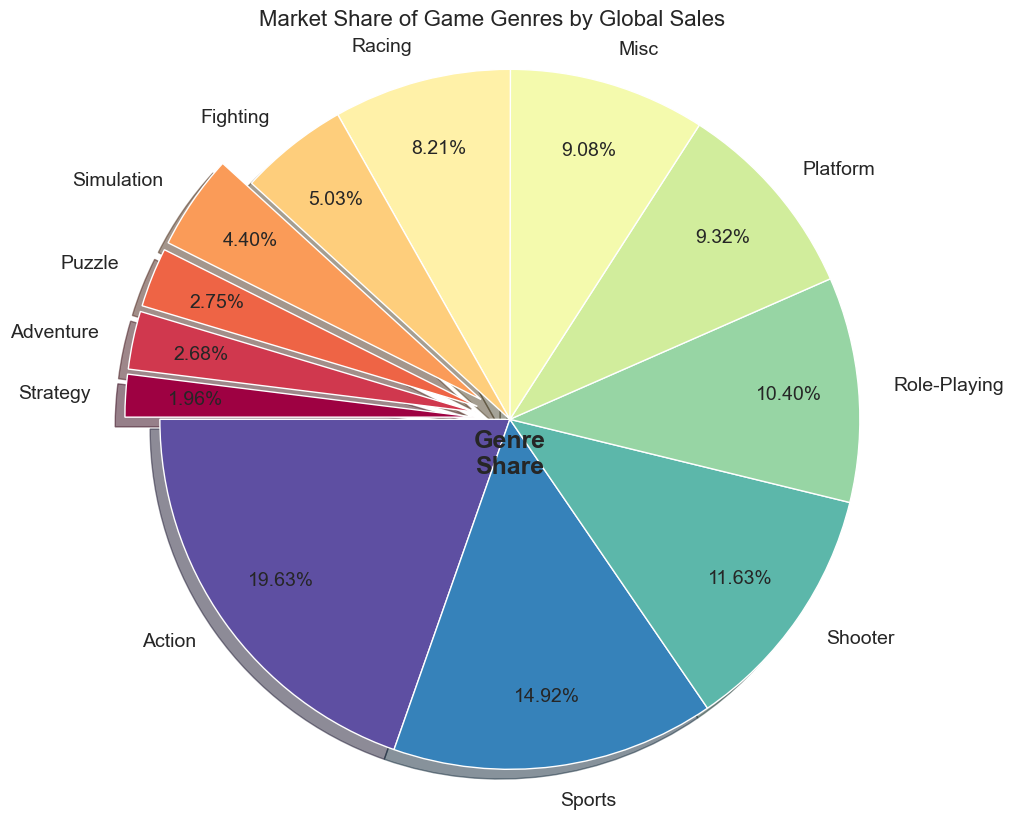

In [67]:
# Prepare for pie chart
labels = genre_sales['Genre']
sizes = genre_sales['Global_Sales']
colors = plt.cm.Spectral_r(np.linspace(0, 1, len(sizes)))
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1]

# Plot as donut chart
plt.figure(figsize=(10, 10))
plt.pie(
    sizes, 
    labels=labels,
    autopct='%0.2f%%', 
    startangle=180,
    colors=colors, 
    shadow=True,
    pctdistance=0.8,
    textprops={'fontsize': 14},
    explode=explode_list
)

plt.text(0, -0.1, 'Genre\nShare', ha='center', va='center', fontsize=18, fontweight='bold')

plt.title("Market Share of Game Genres by Global Sales", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

## **Stacked Area Chart - Regional Video Game Sales Over Time (1980–2016)**

In [52]:
# Group by year and sum sales per region
region_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70


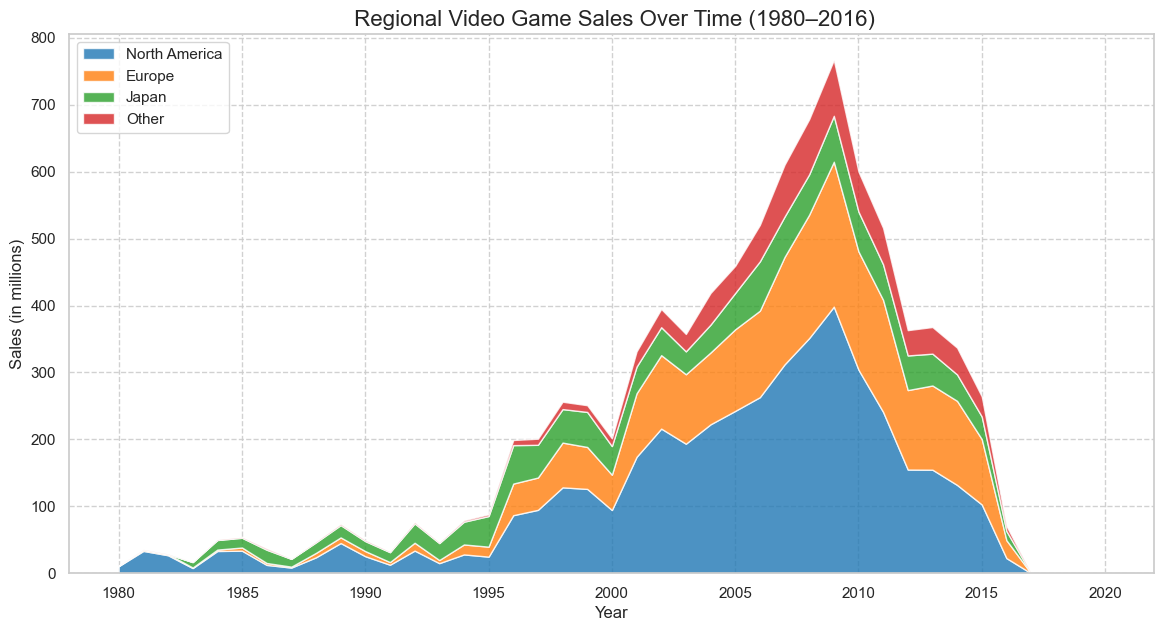

In [74]:
plt.figure(figsize=(14, 7))
plt.stackplot(region_sales.index,
              region_sales['NA_Sales'],
              region_sales['EU_Sales'],
              region_sales['JP_Sales'],
              region_sales['Other_Sales'],
              labels=['North America', 'Europe', 'Japan', 'Other'],
              alpha=0.8,
              colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Chart aesthetics
plt.title(' Regional Video Game Sales Over Time (1980–2016)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()

## **Total Global Sales by Genre**
#### Which Video Game Genres Have Generated the Highest Global Sales?

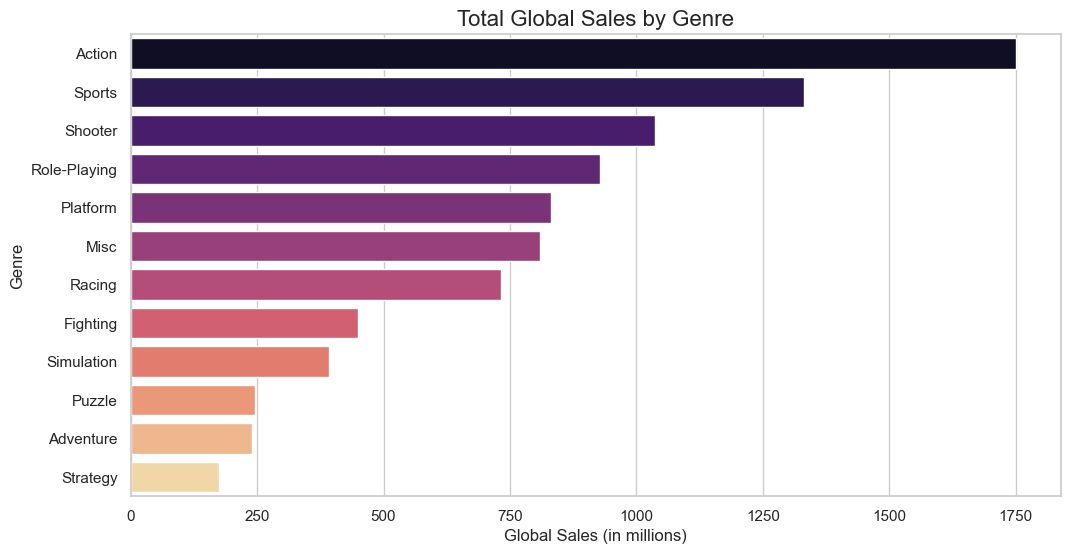

In [32]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='Global_Sales', y='Genre', palette='magma')
plt.title("Total Global Sales by Genre", fontsize=16)
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Genre")

plt.show()

## **Folium Map - Global Video Game Sales by Region**

#### What is the geographical distribution of total video game sales across major regions?

In [80]:
region_coords = {
    'North America': (54.526, -105.2551),
    'Europe': (54.526, 15.2551),
    'Japan': (36.2048, 138.2529),
    'Other': (0.0, 20.0)
}

region_colors = {
    'North America': 'deepskyblue',
    'Europe': 'lime',
    'Japan': 'red',
    'Other': 'orange'
}


region_sales = {
    'North America': 140.5,
    'Europe': 110.3,
    'Japan': 45.8,
    'Other': 25.6
}

# Increased for better visibility on map
scale_factor = 0.3

m = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB dark_matter")

for region, sales in region_sales.items():
    lat, lon = region_coords[region]
    color = region_colors[region]
    radius = sales * scale_factor

    folium.CircleMarker(
        location=(lat, lon),
        radius=radius,
        color='white',
        weight=1,
        fill=True,
        fill_color=color,
        fill_opacity=0.85,
        tooltip=f"{region}: {sales:.2f}M units"
    ).add_to(m)

m

 ## **Line Plot - Year-Wise Sales**
 #### Yearly Sales Trends: How have video game sales evolved over the years? Are they increasing or decreasing?

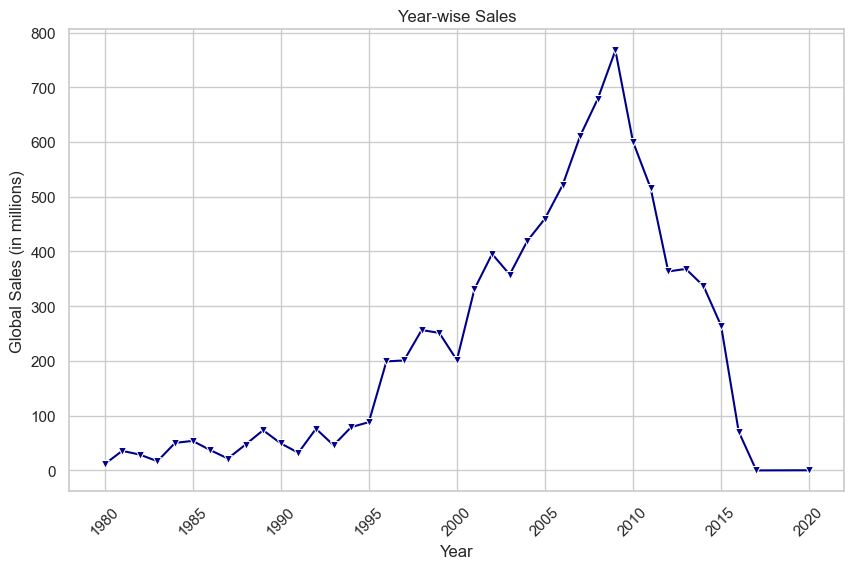

In [83]:
year_sales = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=year_sales.index, y=year_sales.values,  marker='v', color='darkblue')
plt.title('Year-wise Sales')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

## **Bar Plot - Platform Analysis**

### **Which Gaming Platforms Have the Most Game Releases?**
This chart helps reveal how many games were released on each platform, highlighting the most supported or popular platforms among game developers.

In [91]:
platform_counts = df['Platform'].value_counts()
platform_counts.head()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: count, dtype: int64

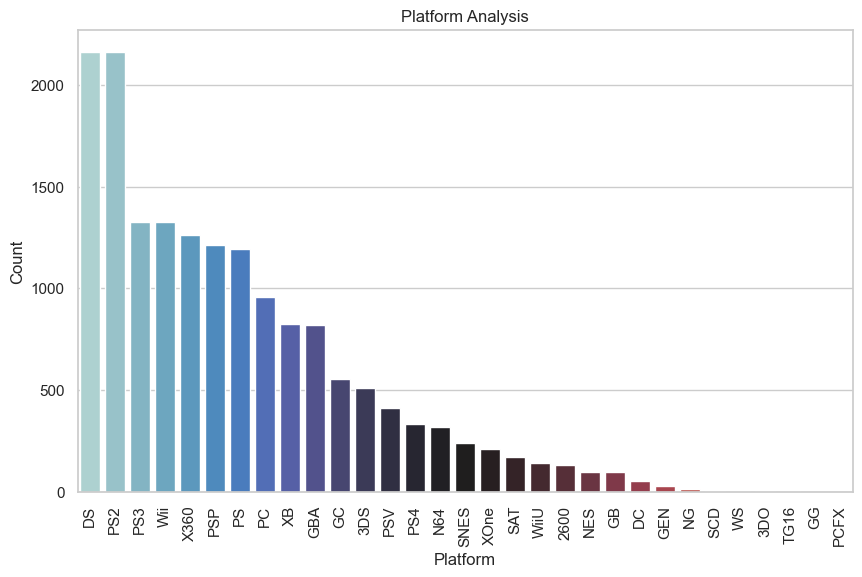

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="icefire")
plt.title('Platform Analysis')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## **Stack Plot - Evolution of Top 5 Gaming Platforms Over Time**

### How Have Global Sales of the Top 5 Gaming Platforms Changed Over the Years?

In [98]:
# Get top 5 platforms by global sales
top_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5).index.tolist()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [104]:
# Filter data for only top platforms
filtered_df = df[df['Platform'].isin(top_platforms)]
filtered_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


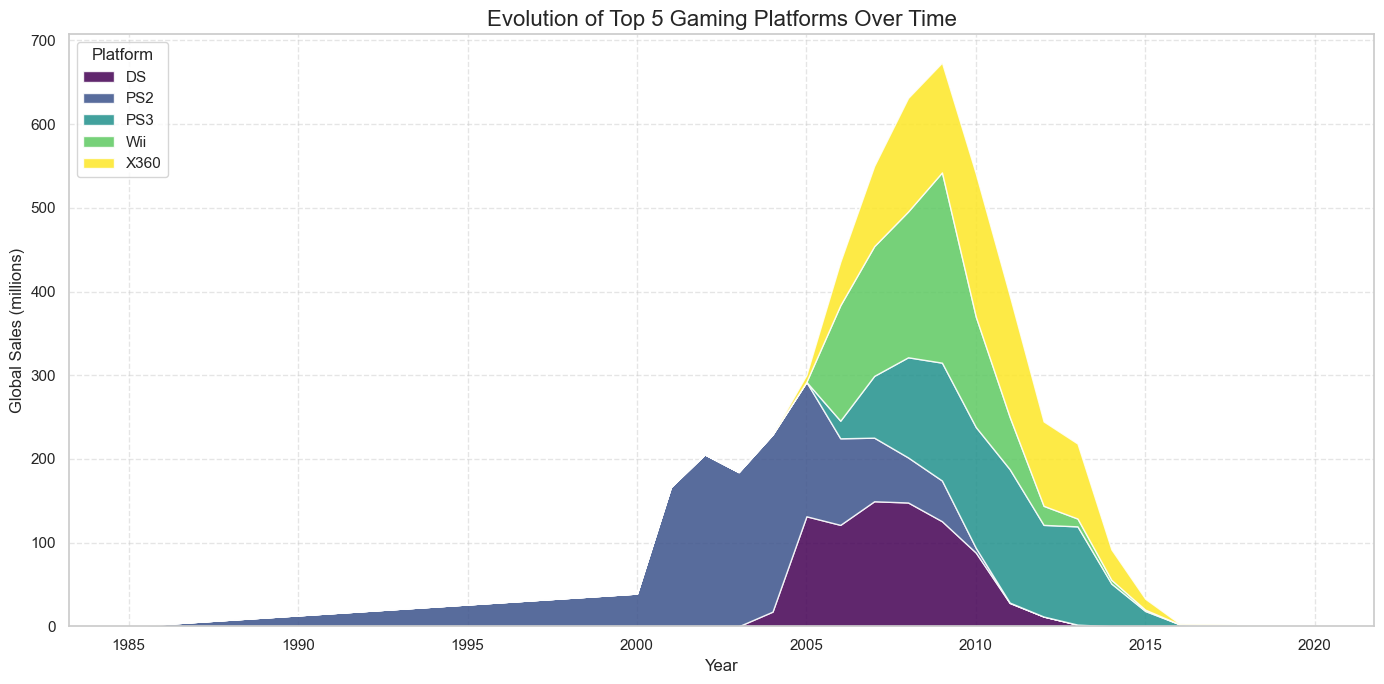

In [111]:
# Ensure platforms are in the correct order (matching DataFrame columns)
ordered_platforms = platform_yearly_sales.columns.tolist()

# Generate colors using a colormap
colors = plt.get_cmap("viridis")(np.linspace(0, 1, len(ordered_platforms)))

# Plotting the stackplot
plt.figure(figsize=(14, 7))
plt.stackplot(platform_yearly_sales.index,
              [platform_yearly_sales[platform] for platform in ordered_platforms],
              labels=ordered_platforms,
              colors=colors,
              alpha=0.85)

# Chart styling
plt.title("Evolution of Top 5 Gaming Platforms Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.legend(title="Platform", loc="upper left")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## **Heatmap - Correlation Map**
### **How Are the Numerical Features in the Dataset Correlated With Each Other?**
#### This correlation heatmap helps identify relationships between numerical variables, such as how strongly things like critic score, user score, or global sales are related.

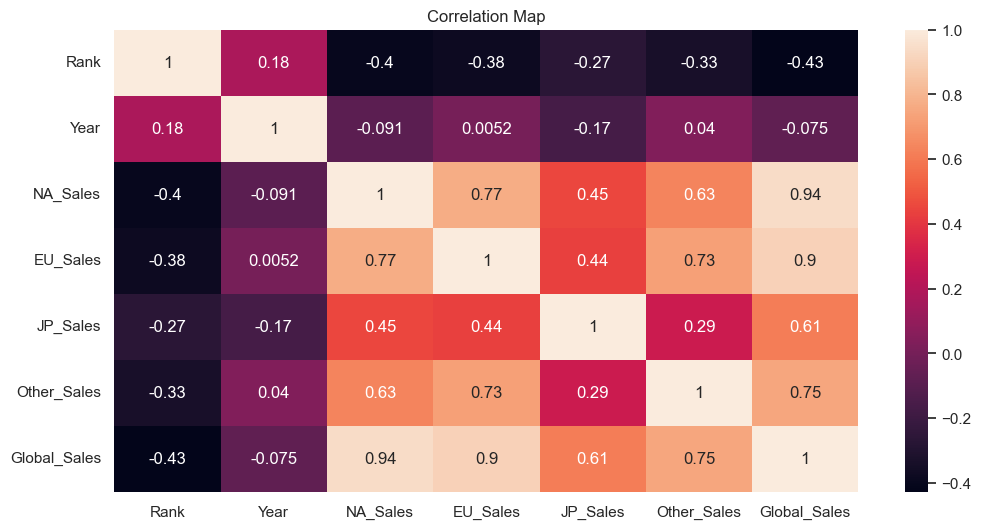

In [96]:
numerical_data=df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,6))
sns.heatmap(data=numerical_data.corr(), annot=True)
plt.title('Correlation Map')
plt.show()

## **Pie Plot - Sales by Region**
#### Which region (North America, Europe, Japan, Rest of the World) contributes the most to global video game sales?

In [114]:
region_sales=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
region_sales

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

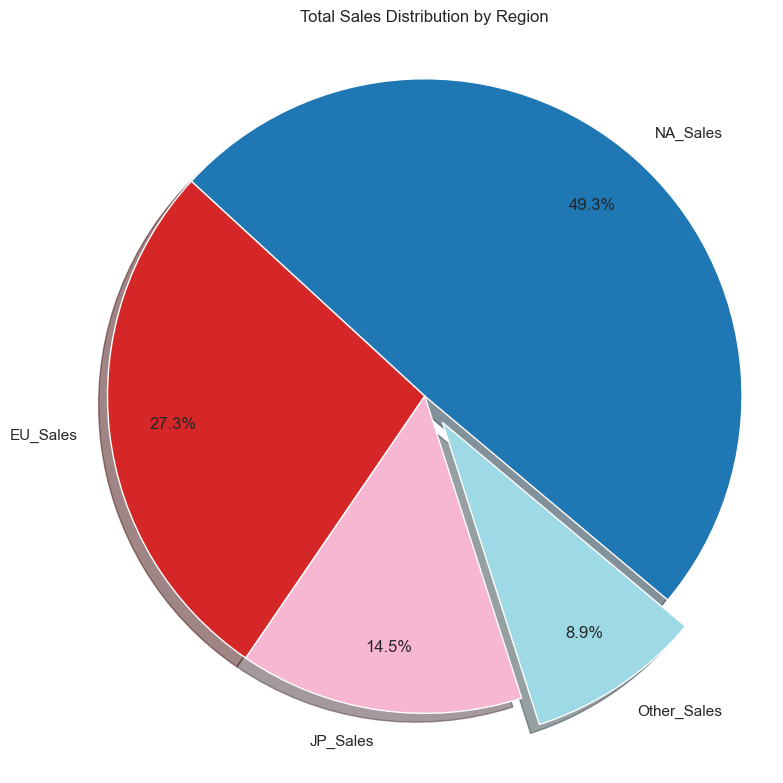

In [126]:
labels = region_sales.index
sizes = region_sales.values
colors = plt.cm.tab20(np.linspace(0, 1, len(sizes)))


explode_list = [0, 0, 0, 0.1]

plt.figure(figsize=(8, 8))
plt.pie(sizes,
        labels=labels, 
        autopct='%1.1f%%', 
        colors=colors, 
        shadow=True,
        pctdistance=0.8,
        startangle=320,
        explode=explode_list 
)
plt.title('Total Sales Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## **Pair Plot - Relationships Between Year and Global Sales**

#### What relationships or patterns can be observed between global sales, release year, and publishers of video games?

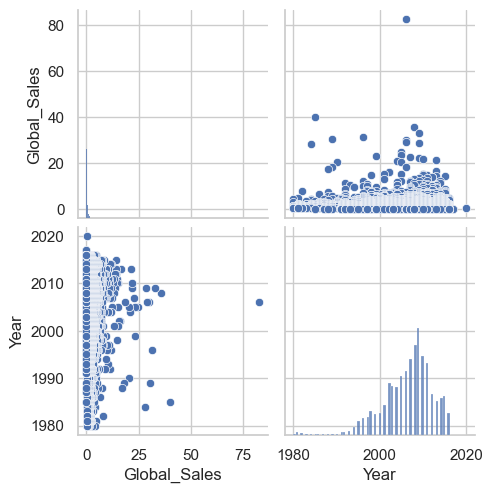

In [40]:
sns.pairplot(df[['Global_Sales', 'Year', 'Publisher']])
plt.show()

## **Multi-Line Plot - Yearly Sales by Region**
#### How have the sales trends evolved over the years in each region?

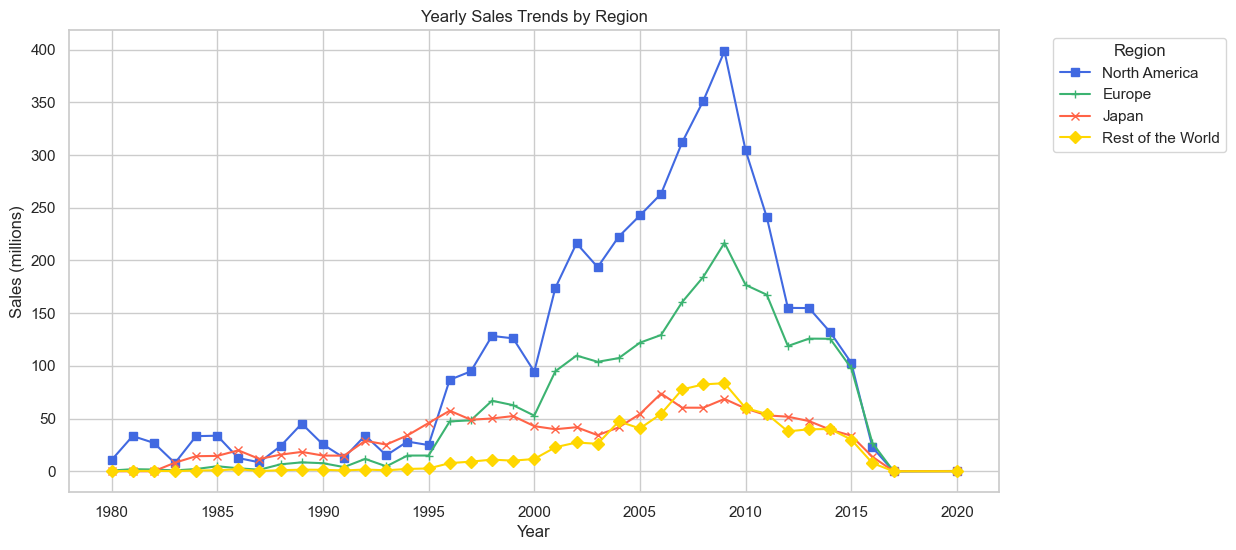

In [41]:
yearly_sales_by_region = df.groupby('Year')[['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']].sum()

# Create line plots to visualize yearly sales trends in each region
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['NA_Sales'],label='North America', marker='s', color='royalblue')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['EU_Sales'],label='Europe', marker='+', color='mediumseagreen')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['JP_Sales'],label='Japan', marker='x', color='tomato')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['Other_Sales'],label='Rest of the World', marker='D', color='gold')
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.title('Yearly Sales Trends by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## **Bar Plot - Top 10 Publishers**
#### Which Publishers Have Released the Most Video Games?
This bar chart shows the top 10 publishers based on the number of games they have released, helping to identify the most prolific companies in the video game industry.

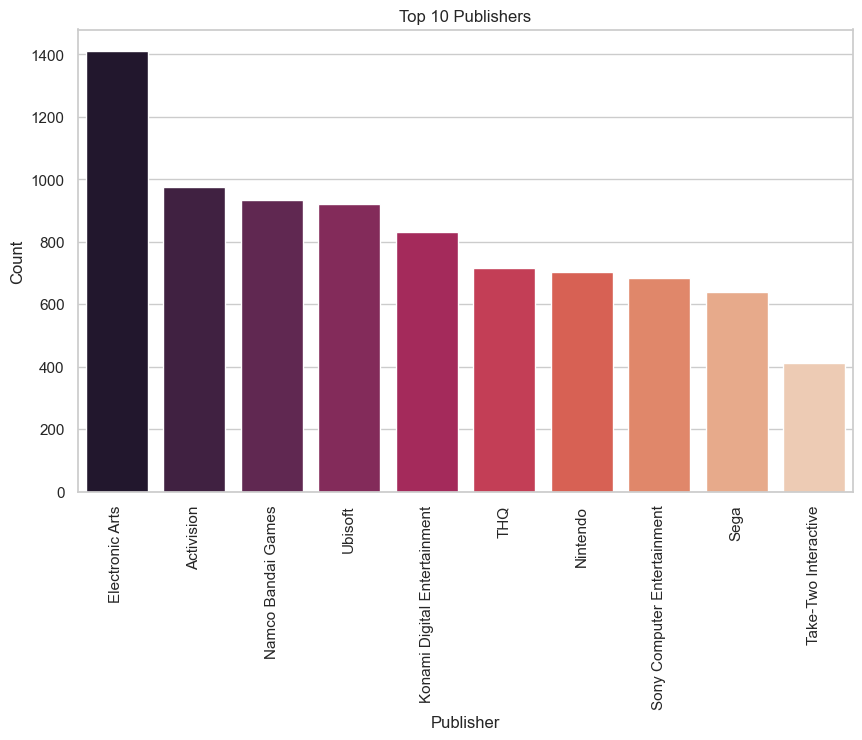

In [42]:
top_publishers = df['Publisher'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values,palette="rocket")
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## **Bar Plot - Region-wise Genre Dominance (Normalized)**
#### How does the popularity of video game genres vary across different regions?

<Figure size 1200x600 with 0 Axes>

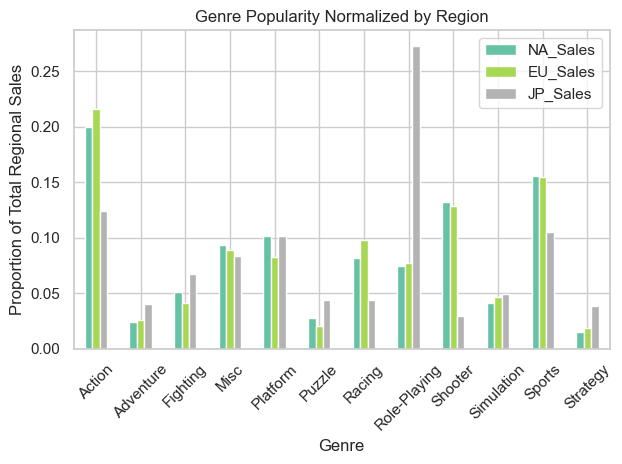

In [43]:
region_genre = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales"]].sum()
region_genre_normalized = region_genre.div(region_genre.sum(axis=0), axis=1)

plt.figure(figsize=(12,6))
region_genre_normalized.plot(kind="bar", stacked=False, colormap="Set2")
plt.title("Genre Popularity Normalized by Region")
plt.ylabel("Proportion of Total Regional Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Timeline plot - Platform Lifespan Analysis**
#### Which platforms dominated the gaming market for the longest period?

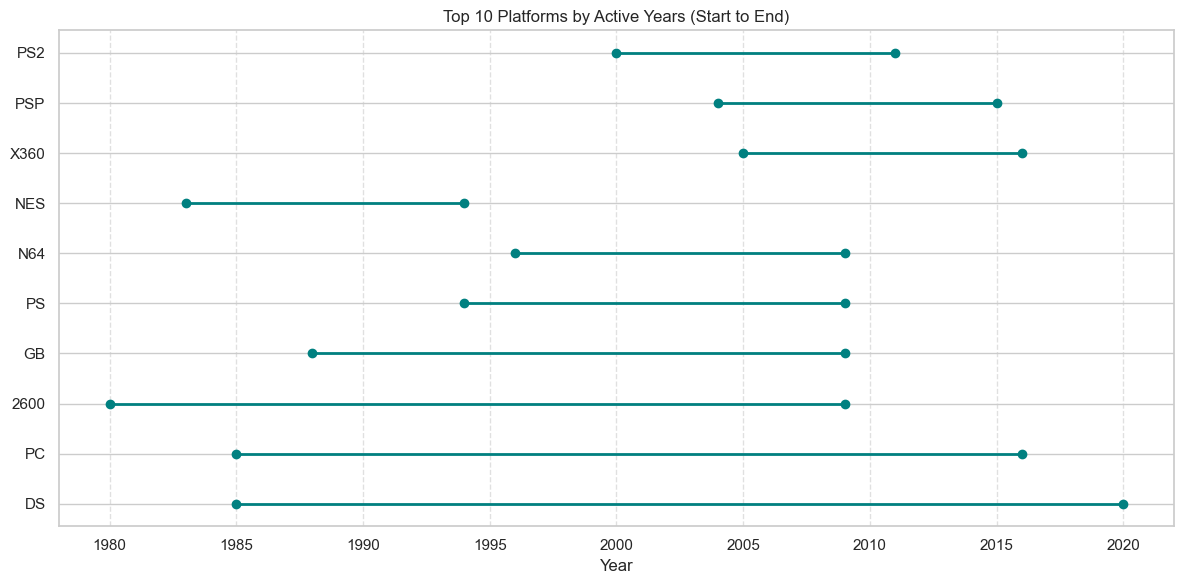

In [44]:
platform_lifespan = df.dropna(subset=["Year"]).groupby("Platform")["Year"].agg(["min", "max"])
platform_lifespan["Lifespan"] = platform_lifespan["max"] - platform_lifespan["min"]
platform_lifespan_sorted = platform_lifespan.sort_values("Lifespan", ascending=False).head(10)

# Reset index to use platform names for plotting
platform_lifespan_sorted = platform_lifespan_sorted.reset_index()

# Timeline-style plot
plt.figure(figsize=(12,6))
for i, row in platform_lifespan_sorted.iterrows():
    plt.plot([row["min"], row["max"]], [i, i], marker='o', color='teal', linewidth=2)

plt.yticks(range(len(platform_lifespan_sorted)), platform_lifespan_sorted["Platform"])
plt.xlabel("Year")
plt.title("Top 10 Platforms by Active Years (Start to End)")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## **Stacked Area Chart - Genre Evolution Over Years**
#### What trends can be observed in genre popularity from year to year in the gaming industry?

<Figure size 1400x600 with 0 Axes>

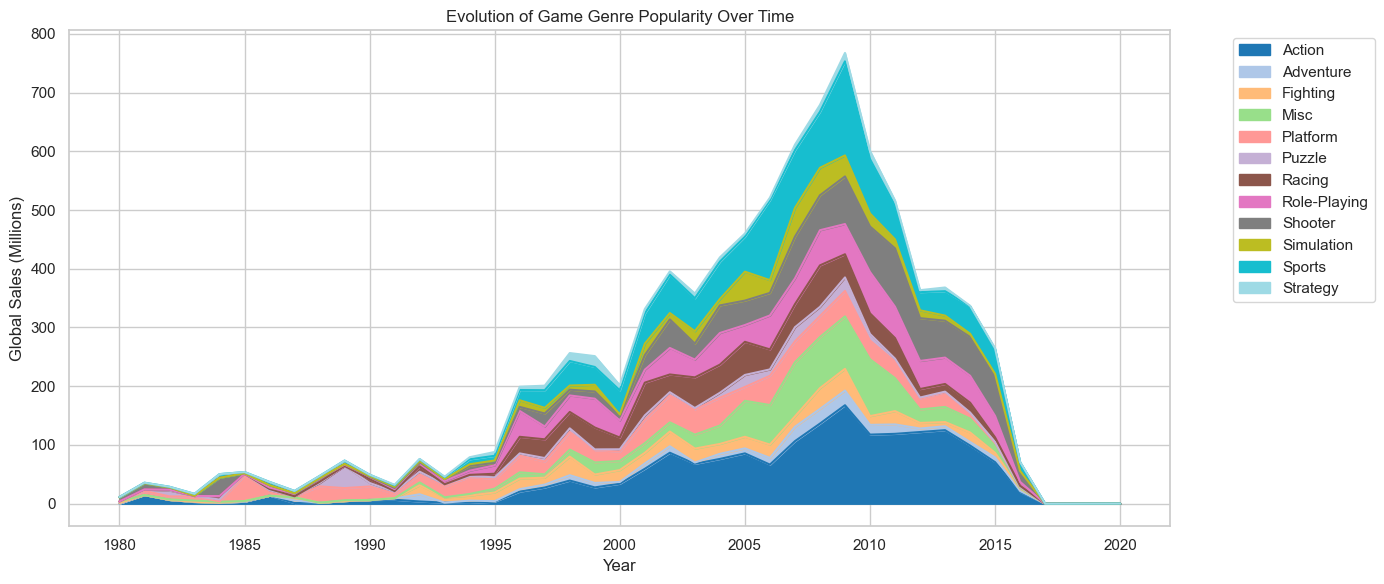

In [45]:
genre_evolution = df.dropna(subset=["Year"]).groupby(["Year", "Genre"])["Global_Sales"].sum().reset_index()
genre_pivot = genre_evolution.pivot(index="Year", columns="Genre", values="Global_Sales").fillna(0)

plt.figure(figsize=(14,6))
genre_pivot.plot(kind="area", stacked=True, colormap="tab20", figsize=(14,6))
plt.title("Evolution of Game Genre Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 
